# 1. Instalar NLP API's

In [1]:
!pip3 install -U spacy

In [2]:
!pip3 install nltk

In [3]:
!pip3 install circlify

# 2. Instalar el modelo (En español)

In [2]:
!pip install SpaCy
!python -m spacy download es

     ---------------------------------------- 12.9/12.9 MB 5.2 MB/s eta 0:00:00
[!] As of spaCy v3.0, shortcuts like 'es' are deprecated. Please use
the full pipeline package name 'es_core_news_sm' instead.
[+] Download and installation successful
You can now load the package via spacy.load('es_core_news_sm')


In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\FAMILIA\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import os
import sys
PATH = os.getcwd()
DIR_DATA = PATH + '{0}data{0}'.format(os.sep)
sys.path.append(PATH) if PATH not in list(sys.path) else None
DIR_DATA

'C:\\Users\\FAMILIA\\Proyecto final IA\\data\\'

In [5]:
!pip3 install seaborn

# 3. Importar las librerias

In [2]:
import numpy as np
import pandas as pd
from tqdm import tqdm
from collections import Counter

# Plot libraries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Text analysis API's
import re
import spacy
import nltk
import unicodedata
from nltk.corpus import stopwords
from nltk import TweetTokenizer
from spacy.lang.es import Spanish

# Preprocessin API´s
from sklearn.preprocessing import LabelEncoder 
from sklearn import preprocessing

# Regularization API´s 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Feature extration API´s
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Machine Learning Methods 

from sklearn.linear_model import LogisticRegression

# Metrics Libraries
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score


# 4. Inicializar spaCy y cargar el modelo

In [3]:
nlp = spacy.load('es_core_news_sm')

# 5. Importar Dataset

In [39]:
data_raw = pd.read_csv('esdata.csv', sep=',')
data_raw.head(10)

,tweetid,user,content,date,lang,polarity
0,768213876278165504,OnceBukowski,-Me caes muy bien \r\n-Tienes que jugar más pa...,2016-08-23 22:30:35,es,NONE
1,768213567418036224,anahorxn,@myendlesshazza a. que puto mal escribo\r\n\r\...,2016-08-23 22:29:21,es,N
2,768212591105703936,martitarey13,@estherct209 jajajaja la tuya y la d mucha gen...,2016-08-23 22:25:29,es,N
3,768221670255493120,endlessmilerr,Quiero mogollón a @AlbaBenito99 pero sobretodo...,2016-08-23 23:01:33,es,P
4,768221021300264964,JunoWTFL,Vale he visto la tia bebiendose su regla y me ...,2016-08-23 22:58:58,es,N
5,768220253730009091,Alis_8496,@Yulian_Poe @guillermoterry1 Ah. mucho más por...,2016-08-23 22:55:55,es,P
6,768224728049999872,caval100,Se ha terminado #Rio2016 Lamentablemente no ar...,2016-08-23 23:13:42,es,N
7,768231706746912769,mgcsunshine,11. siiii fue super gracioso teniamos que habe...,2016-08-23 23:41:26,es,P
8,768231229439311872,__LOST_PRINCESS,@toNi_end seria mejor que dejasen de emitir es...,2016-08-23 23:39:32,es,N
9,768231166965145600,ConLDeLucifer_,"@jonoro96 te mandaria a comprarte un burro, pe...",2016-08-23 23:39:17,es,N


# 6. Describiendo el Dataset

In [40]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1008 entries, 0 to 1007
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweetid   1008 non-null   int64 
 1   user      1008 non-null   object
 2   content   1008 non-null   object
 3   date      1008 non-null   object
 4   lang      1008 non-null   object
 5   polarity  1008 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.4+ KB


# 7. Descripción del contenido 

## 7.1 Serie de tiempo de tweets

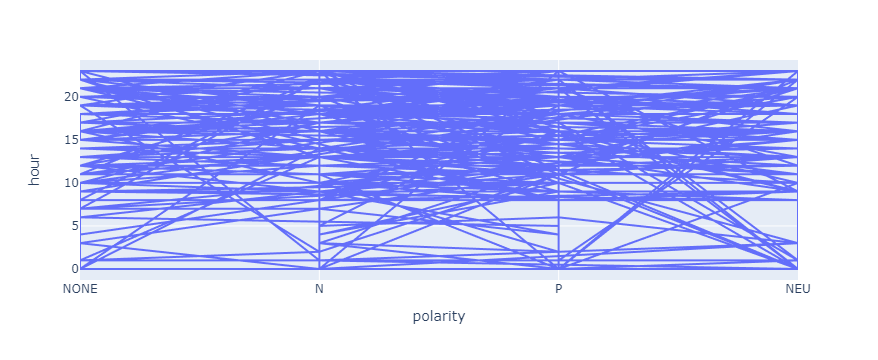

In [41]:
data_raw['hour'] = pd.DatetimeIndex(data_raw['date']).hour
data_raw['minute'] = pd.DatetimeIndex(data_raw['date']).minute
fig = px.line(data_raw, x='polarity', y='hour') 
fig.show()

## 7.2 Descripción de la polaridad 

In [42]:
tweet_by_polarity = data_raw.groupby("polarity", as_index=False)['content'].count()
tweet_by_polarity.head(10)

,polarity,content
0,N,418
1,NEU,133
2,NONE,139
3,P,318


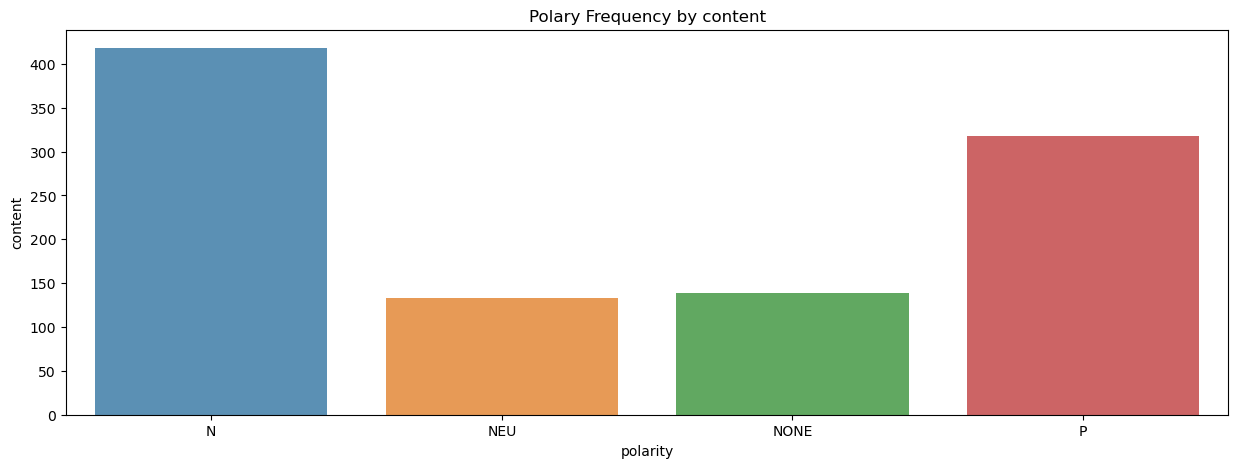

In [44]:
plt.figure(figsize=(15,5))
sns.barplot(data =tweet_by_polarity, x = "polarity", y = "content", alpha=0.8)
plt.title('Polary Frequency by content')
plt.show()

## 7. 3 Uso de palabras en tweets

In [45]:
words = {}
for row in tqdm(data_raw['content']):
    doc = nlp(row.lower())
    for token in doc:
        if token.is_alpha and not token.is_stop:
            if token.text in words:
                num_temp = int(words[token.text])
                words[token.text] = num_temp + 1
            else:
                words[token.text] = 1


100%|██████████| 1008/1008 [00:14<00:00, 70.90it/s]


In [46]:
df_words = pd.DataFrame([[key, words[key]] for key in words.keys()], columns=['Word', 'Freq'])
df_words.sort_values('Freq')
df_words = df_words[:20]
df_words.head(10)

,Word,Freq
0,caes,1
1,jugar,8
2,partidas,1
3,lol,1
4,russel,1
5,otako,2
6,deja,5
7,muero,3
8,puto,6
9,escribo,4


In [47]:
def get_colordict(palette,number,start):
    pal = list(sns.color_palette(palette=palette, n_colors=number).as_hex())
    color_d = dict(enumerate(pal, start=start))
    return color_d

In [48]:
import circlify
# compute circle positions:
circles = circlify.circlify(df_words['Freq'][0:30].tolist(), 
                            show_enclosure=False, 
                            target_enclosure=circlify.Circle(x=0, y=0)
                           )
n = df_words['Freq'][0:30].max()
color_dict = get_colordict('RdYlBu_r',n ,1)

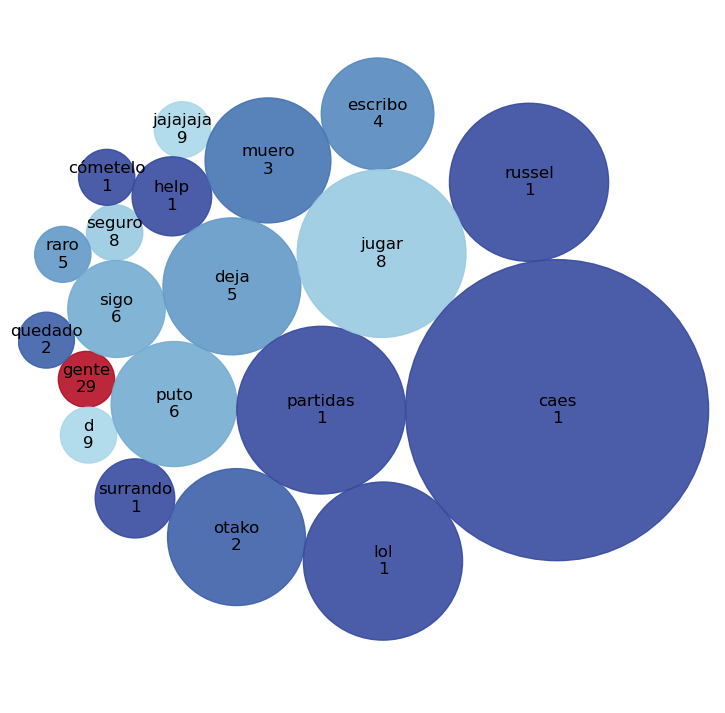

In [49]:
fig, ax = plt.subplots(figsize=(9,9), facecolor='white')
ax.axis('off')
lim = max(max(abs(circle.x)+circle.r, abs(circle.y)+circle.r,) for circle in circles)
plt.xlim(-lim, lim)
plt.ylim(-lim, lim)

# list of labels
labels = list(df_words['Word'][0:30])
counts = list(df_words['Freq'][0:30])
labels.reverse()
counts.reverse()

# print circles
for circle, label, count in zip(circles, labels, counts):
    x, y, r = circle
    ax.add_patch(plt.Circle((x, y), r, alpha=0.9, color = color_dict.get(count)))
    plt.annotate(label +'\n'+ str(count), (x,y), size=12, va='center', ha='center')
plt.xticks([])
plt.yticks([])
plt.show()

In [50]:
pos_freq = {}
for row in tqdm(data_raw['content'].to_list()):
    doc = nlp(row.lower())
    for token in doc:
        if token.pos_ in pos_freq:
            value = pos_freq[token.pos_]
            pos_freq[token.pos_] = value + 1
        else:
            pos_freq[token.pos_] =  1

100%|██████████| 1008/1008 [00:08<00:00, 116.15it/s]


In [51]:
df_pos = pd.DataFrame([[key, pos_freq[key]] for key in pos_freq.keys()], columns=['POS', 'Freq'])
df_pos.sort_values('Freq').tail(15)
df_pos = df_pos[:20]
df_pos.head(10)

,POS,Freq
0,VERB,2184
1,NOUN,2720
2,ADV,1143
3,SPACE,361
4,DET,1542
5,SCONJ,619
6,ADP,1715
7,CCONJ,619
8,PRON,1445
9,ADJ,1374


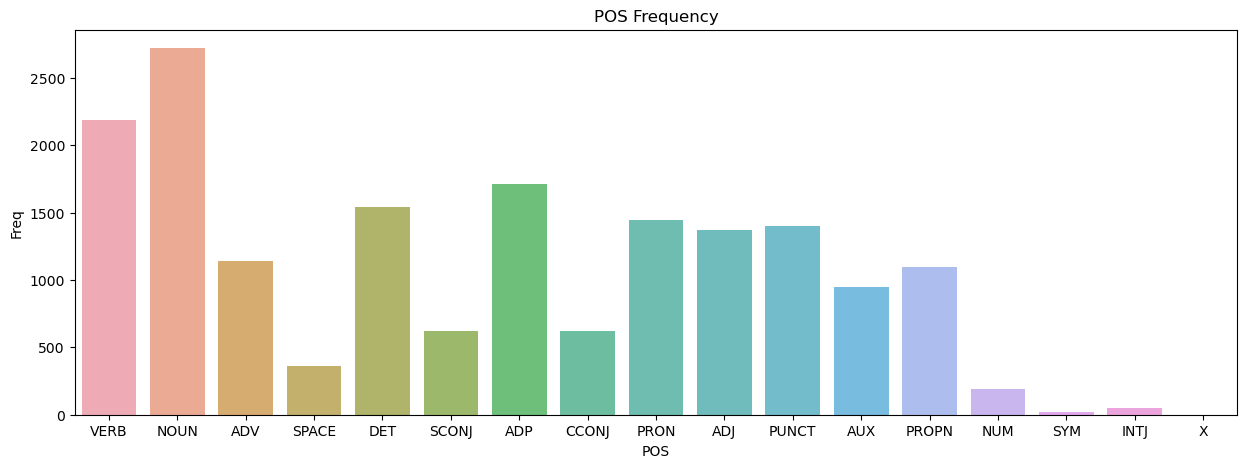

In [52]:
plt.figure(figsize=(15,5))
sns.barplot(data = df_pos, x = 'POS', y = 'Freq', alpha=0.8)
plt.title('POS Frequency')
plt.show()

# 8. Preprocesamiento

In [53]:
def processing(text: str):
    result = ''
    try:
        text = unicodedata.normalize('NFD', text)
        text = text.encode('ascii', 'ignore')
        text_out = text.decode("utf-8")
        text_out = text_out.lower()
        text_out = re.sub("[\U0001f000-\U000e007f]", 'EMOJI', text_out)
        text_out = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+'
                          r'|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))',
                          'URL', text_out)
        text_out = re.sub("@([A-Za-z0-9_]{1,40})", 'MENTION', text_out)
        text_out = re.sub("#([A-Za-z0-9_]{1,40})", 'HASTAG', text_out)
        # Remove patterns
        
        text_out = re.sub(r'\©|\×|\⇔|\_|\»|\«|\~|\#|\$|\€|\Â|\�|\¬', '', text_out)
        text_out = re.sub(r'\,|\;|\:|\!|\¡|\’|\‘|\”|\“|\"|\'|\`', '', text_out)
        text_out = re.sub(r'\}|\{|\[|\]|\(|\)|\<|\>|\?|\¿|\°|\|', '', text_out)
        text_out = re.sub(r'\/|\-|\+|\*|\=|\^|\%|\&|\$', '', text_out)
        text_out = re.sub(r'\b\d+(?:\.\d+)?\s+', '', text_out)
        text_out = re.sub(r'[0-9]', '', text_out)
        text_out = re.sub(r'\s+', ' ', text_out).strip()
        text_out = text_out.rstrip()
        result = text_out if text_out != ' ' else None
    except Exception as e:
        print('Error processing: {0}'.format(e))
    return result

In [54]:
messages = [processing(row) for row in data_raw['content'].tolist()]
messages

['me caes muy bien tienes que jugar mas partidas al lol con russel y conmigo por que tan otako deja de ser otako haber si me muero',
 'MENTION a. que puto mal escribo b. me sigo surrando help . ha quedado raro el cometelo ahi jajajaja',
 'MENTION jajajaja la tuya y la d mucha gente seguro pero yo no puedo sin mi melena me muero',
 'quiero mogollon a MENTION pero sobretodo por lo rapido que contesta a los wasaps',
 'vale he visto la tia bebiendose su regla y me hs dado muchs grima',
 'MENTION MENTION ah. mucho mas por supuesto solo que lo incluyo. me habias entendido mal',
 'se ha terminado HASTAG lamentablemente no arriendo las ganancias al pueblo brasileno por la penuria que les espera suerte y solidaridad',
 '. siiii fue super gracioso teniamos que habernos sacado una foto',
 'MENTION seria mejor que dejasen de emitir esa basura ya hay que evolucionar para bien y eso',
 'MENTION te mandaria a comprarte un burro pero no creo que hayan tiendas abiertas ahora',
 'mg y pongo un adjetivo 

In [55]:
stop_words = stopwords.words('spanish')
stop_words

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [56]:
bow = CountVectorizer(analyzer='word', ngram_range=(1, 3), stop_words= stop_words)

In [57]:
bow.fit(messages)

CountVectorizer(ngram_range=(1, 3),
                stop_words=['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los',
                            'del', 'se', 'las', 'por', 'un', 'para', 'con',
                            'no', 'una', 'su', 'al', 'lo', 'como', 'más',
                            'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí',
                            'porque', ...])

In [58]:
x = bow.transform(messages).toarray()
x

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [ ]:
df = pd.DataFrame(x, index=['tweet '+str(i) for i in range(1, 1+len(messages))])
df.round(3)

In [ ]:
y = data_raw['polarity']
y

In [ ]:
Counter(y)

In [ ]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [ ]:
Counter(y)

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.3, random_state=42)

In [ ]:
softmax = LogisticRegression(multi_class="multinomial", solver="lbfgs")

In [ ]:
softmax.fit(x_train, y_train)

In [ ]:
y_predict = softmax.predict(x_test)
y_predict

In [ ]:
cm = confusion_matrix(y_test, y_predict)
plt.figure()
sns.heatmap(cm , annot =True, linewidth=0.8,fmt=".1f")
plt.title("Softmax")
plt.show()

In [ ]:
print(classification_report(y_test, y_predict))

In [ ]:
f1 = f1_score(y_test, y_predict, average="macro")
precision = precision_score(y_test, y_predict, average="macro")
recall = recall_score(y_test, y_predict, average="macro")
accuracy = accuracy_score(y_test, y_predict, normalize=True)
print('F1: ',f1)
print('Precision: ', precision)
print('Recall: ', recall)
print('Accuracy: ', accuracy)